In [29]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
pd.set_option('display.max_columns', None)

dtrain=pd.read_csv("C:/Users/ST/Desktop/aidea_leave_job/train.csv")
season=pd.read_csv("C:/Users/ST/Desktop/aidea_leave_job/season.csv")
dtest=pd.read_csv("C:/Users/ST/Desktop/aidea_leave_job/test.csv")
dtrain

,yyyy,PerNo,PerStatus,sex,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0


In [2]:
dtrain.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
dtest.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)

dtrain

,年份,個人編號,離職與否,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0


In [23]:
dtrain['工作分類'][1].type

AttributeError: 'str' object has no attribute 'type'

In [3]:
cols=[c for c in dtrain.columns if c not in '離職與否']
X_train, X_valid, y_train, y_valid = train_test_split(dtrain[cols], dtrain['離職與否'], test_size=0.3, random_state=777)

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
xgbc = xgb.XGBClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
                           silent=True,
                           objective='binary:logistic',
                           colsample_bytree=0.5,
                           reg_lambda=0,
                           seed=1,
)

# F beta score =3.25*(precision*recall)/(2.25*precision)+recall，label:y

def f_beta(preds,dtrain):
    label = dtrain.get_label()
    preds = 1.0/(1.0+np.exp(-preds))
    pred = [int(i >= 0.5) for i in preds]
    tp = sum([int(i == 1 and j == 1) for i,j in zip(pred,label)])
    precision=float(tp)/sum(pred)
    recall=float(tp)/sum(label)
    return 'f_beta_score', 3.25 * (precision*recall)/((2.25*precision)+recall)

xgbc.fit(X_train, y_train, eval_metric='auc', eval_set=[(X_valid, y_valid)],verbose=True)


[0]	validation_0-auc:0.62049
[1]	validation_0-auc:0.671218
[2]	validation_0-auc:0.67281
[3]	validation_0-auc:0.695709
[4]	validation_0-auc:0.702995
[5]	validation_0-auc:0.701077
[6]	validation_0-auc:0.697817
[7]	validation_0-auc:0.705219
[8]	validation_0-auc:0.70433
[9]	validation_0-auc:0.705532
[10]	validation_0-auc:0.70538
[11]	validation_0-auc:0.702598
[12]	validation_0-auc:0.703909
[13]	validation_0-auc:0.703946
[14]	validation_0-auc:0.704427
[15]	validation_0-auc:0.707122
[16]	validation_0-auc:0.707568
[17]	validation_0-auc:0.709496
[18]	validation_0-auc:0.711969
[19]	validation_0-auc:0.712274
[20]	validation_0-auc:0.713405
[21]	validation_0-auc:0.716751
[22]	validation_0-auc:0.720738
[23]	validation_0-auc:0.726828
[24]	validation_0-auc:0.726408
[25]	validation_0-auc:0.726276
[26]	validation_0-auc:0.73031
[27]	validation_0-auc:0.729245
[28]	validation_0-auc:0.727544
[29]	validation_0-auc:0.729692
[30]	validation_0-auc:0.729107
[31]	validation_0-auc:0.727842
[32]	validation_0-auc:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=1,
              silent=True, subsample=1, verbosity=1)

<function matplotlib.pyplot.show(*args, **kw)>

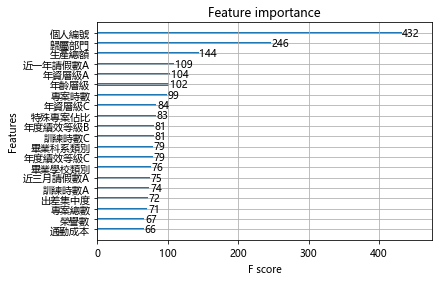

In [58]:
from xgboost import plot_importance
plot_importance(xgbc, max_num_features=20)
plt.show

In [30]:
categorical=[c for c in dtrain.columns if c not in ['個人編號','年份','離職與否']]
dtrain.fillna(999,inplace=True)
dtrain[categorical]=dtrain[categorical].astype(float).astype(int).astype(str)

In [34]:
dtrain[]

,yyyy,PerNo,PerStatus,sex,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1,1,3,19,4,0,1,1,0,0,23,1,1,3,6,0,0,5,7,1,1,1,3,5,0,0,5,0,9,2,10,4,6,1,2,1,1,2,999,999,5,0,8,19138
1,2015,1,0,1,1,3,19,6,0,1,1,0,0,23,2,1,1,6,0,0,8,9,2,0,1,4,6,0,0,3,1,4,2,1,5,7,1,2,2,1,2,999,999,5,2,8,19138
2,2016,1,0,1,1,3,19,6,0,1,1,0,0,23,3,5,1,6,2,0,5,10,2,0,1,4,7,0,0,2,1,2,2,1,2,7,1,2,2,1,2,999,999,5,2,8,19138
3,2017,1,0,1,1,3,19,6,0,1,1,0,0,23,4,5,5,6,0,0,10,8,2,0,2,5,5,0,0,2,1,1,2,8,5,7,1,2,2,1,2,999,999,5,2,8,19138
4,2014,3,0,0,1,4,8,1,0,0,0,0,0,23,4,5,1,6,0,0,1,8,0,0,6,3,6,0,0,0,0,0,6,4,2,9,1,5,5,0,0,2,4,1,2,8,8181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1,1,7,8,1,0,0,0,0,0,23,1,5,0,5,0,0,1,2,1,0,5,4,6,0,0,0,0,0,1,1,5,10,1,6,5,2,1,3,3,8,2,8,8012
14388,2015,8774,0,1,1,7,8,1,0,0,0,0,0,22,1,5,0,5,0,0,0,2,1,0,5,2,8,0,0,0,0,0,1,1,5,10,1,6,5,2,1,3,3,8,2,8,8012
14389,2016,8774,0,1,1,7,8,1,0,0,0,0,0,23,1,5,0,5,0,0,1,1,1,0,5,4,6,0,0,0,0,0,1,1,5,11,1,7,6,2,1,3,3,8,2,8,8012
14390,2017,8774,0,1,1,7,8,1,0,0,0,0,0,23,1,5,1,5,0,0,1,1,0,0,5,2,5,0,0,1,0,0,1,1,5,11,1,7,6,2,1,3,3,8,2,8,8012


In [36]:
import catboost as cb

cat = cb.CatBoostClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
                           eval_metric='AUC'         
)
cat.fit(X_train, y_train,  eval_set=[(X_valid, y_valid)],cat_features=cols,verbose=True,use_best_model=True)


0:	test: 0.5212949	best: 0.5212949 (0)	total: 169ms	remaining: 1m 24s
1:	test: 0.6491077	best: 0.6491077 (1)	total: 201ms	remaining: 49.9s
2:	test: 0.6397176	best: 0.6491077 (1)	total: 208ms	remaining: 34.5s
3:	test: 0.6564617	best: 0.6564617 (3)	total: 215ms	remaining: 26.7s
4:	test: 0.6539041	best: 0.6564617 (3)	total: 221ms	remaining: 21.9s
5:	test: 0.6555777	best: 0.6564617 (3)	total: 227ms	remaining: 18.7s
6:	test: 0.6609941	best: 0.6609941 (6)	total: 233ms	remaining: 16.4s
7:	test: 0.6686001	best: 0.6686001 (7)	total: 240ms	remaining: 14.7s
8:	test: 0.6641487	best: 0.6686001 (7)	total: 246ms	remaining: 13.4s
9:	test: 0.6640759	best: 0.6686001 (7)	total: 251ms	remaining: 12.3s
10:	test: 0.6826852	best: 0.6826852 (10)	total: 257ms	remaining: 11.4s
11:	test: 0.6860088	best: 0.6860088 (11)	total: 264ms	remaining: 10.7s
12:	test: 0.6963401	best: 0.6963401 (12)	total: 271ms	remaining: 10.1s
13:	test: 0.6994868	best: 0.6994868 (13)	total: 277ms	remaining: 9.63s
14:	test: 0.7051359	best:

In [ ]:
# 離職很多女生
leave_df = dtrain['離職與否']

In [ ]:
# perNo count
dtrain['個人編號']


In [ ]:
# confusion matrix


In [ ]:
# unique values


In [ ]:
# 歸屬部門離職率


In [ ]:
# 生產總額圖


In [ ]:
# 近一年請假數A


In [ ]:
# 年資層級A


In [37]:
train_no=dtrain['個人編號'].tolist()
test_no=dtest['個人編號'].tolist()

accordance_ratio=len(set(train_no) & set(test_no))/len(test_no)
# Do not drop perNo
print(accordance_ratio)

0.9023803155924044
